In [ ]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
init_printing() 

# Tarea Derivada

Los siguientes datos, son datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa kinovea. Dados los datos en formato csv, se pide  construir un programa que realice lo siguiente: 

1. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

2. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?


3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación. 

- Encuentra el valor máximo empleando metodos de diferenciación.







In [ ]:
import pandas as pd

In [ ]:
route = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"
df = pd.read_csv(route,";")

In [ ]:
col = ["Tiempo[ms]", "AnguloDeg", "AnguloRad"]
#1. Como hacer un rename 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

#2. Como pasar los valores del angulo que son tipo string a float 

In [ ]:
df = df.rename(columns = {'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})
df

,Tiempo[ms],AnguloDeg
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [ ]:
valor1=df["AnguloDeg"].values[0]
valor1

'59,289611816406'

In [ ]:
a="3.0"
(df["AnguloDeg"].values)

array(['59,289611816406', '59,9823265075684', '61,2374534606934', ...,
       '97,9406890869141', '99,3180923461914', '100,637817382813'],
      dtype=object)

In [ ]:
valor2 = valor1.replace(",", ".")

In [ ]:
eval_= np.vectorize(eval )
d = eval_(df["AnguloDeg"].str.replace(",", "."))

In [ ]:
type(d[0])

numpy.float64

In [ ]:
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",", ".").astype("float64")

In [ ]:
df["AnguloRad"] = np.deg2rad(df["AnguloDeg"].values )

In [ ]:
df["AnguloRad"] = df["AnguloRad"] - np.pi/2
print(df["AnguloRad"])

0      -0.535997
1      -0.523907
2      -0.502001
3      -0.462644
4      -0.429547
          ...   
2842    0.086177
2843    0.113095
2844    0.138591
2845    0.162631
2846    0.185665
Name: AnguloRad, Length: 2847, dtype: float64


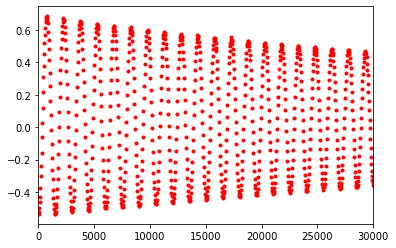

In [ ]:
plt.figure()
plt.plot(df["Tiempo[ms]"], df["AnguloRad"], "r.")
plt.xlim(0, 30000 )

In [ ]:
from scipy.fft import fft, fftfreq

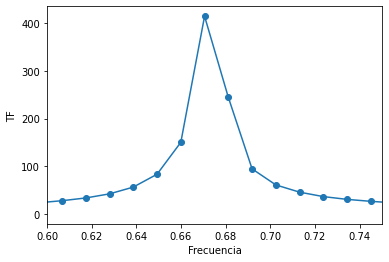

In [ ]:
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0.6, 0.75)

In [ ]:
from scipy.interpolate import CubicSpline


In [ ]:
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

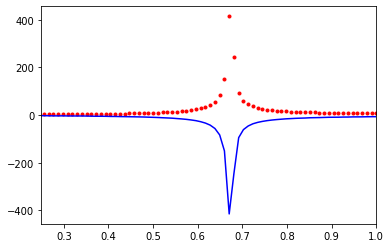

In [ ]:
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"r.")
plt.plot(abs(xf[1:N//2]), -abs(cs(xf[1:N//2])),"b" ) 
plt.xlim(0.25, 1)

In [ ]:
from scipy import optimize


In [ ]:
cs = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2]))
min = optimize.fmin_powell(cs, 0.2)


Optimization terminated successfully.
         Current function value: -417.867925
         Iterations: 2
         Function evaluations: 44


In [ ]:
abs(cs(min))

In [ ]:
min

array(0.67156)

In [ ]:
cs(0.67156)

array(-417.86792463)